<a id='TOC'></a>

## TOC:

* [Data Preparation, Analysis, and Visualizations](#Data_Exploration)
* [Model (no DropOuts - no Scaling) Training](#model_simple)
* [Model (with DropOuts - no Scaling) Training](#model_DropOuts)
* [Model (with DropOuts - with Scaling) Training](#model_DropOuts_Scaling)
* [Model Analysis (Metrices)](#metrices)

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

<a id='Data_Exploration'></a>
Read and explore the Dataset.

In [2]:
# read in the fashion MNIST dataset from keras repository
Fashion_MNIST = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = Fashion_MNIST.load_data()

In [3]:
print(np.shape(X_train), np.shape(X_test))

(60000, 28, 28) (10000, 28, 28)


In [4]:
np.shape(X_train[0])

(28, 28)

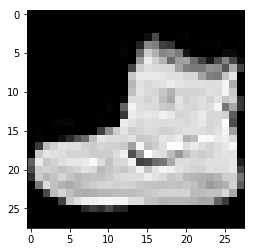

In [5]:
plt.imshow(X_train[0], cmap='gray')

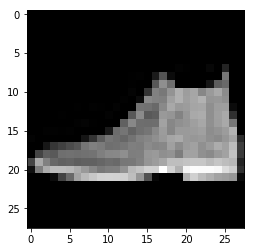

In [6]:
plt.imshow(X_test[0], cmap='gray')

<a id='#model_simple'></a>

In [7]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model

In [8]:
# read in the number of classes
cls_num = len(set(y_train))
print(cls_num)

10


In [9]:
# To make the input valid for Functional API approach, the shape of X_train/test must be expanded
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [10]:
# creating the model using the approach called "Functional API"
i = Input(shape=np.shape(X_train[0]))
x = Conv2D(32, (3, 3), strides=2, padding='same', activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, padding='same', activation='relu')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(cls_num, activation='softmax')(x)

In [11]:
model = Model(i, x)

In [12]:
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.4505 - accuracy: 0.8514 - val_loss: 0.3380 - val_accuracy: 0.8809
Epoch 2/10
60000/60000 [==============================] - 46s 760us/sample - loss: 0.2965 - accuracy: 0.8892 - val_loss: 0.3144 - val_accuracy: 0.8887
Epoch 3/10
60000/60000 [==============================] - 46s 775us/sample - loss: 0.2572 - accuracy: 0.9033 - val_loss: 0.3124 - val_accuracy: 0.8926
Epoch 4/10
60000/60000 [==============================] - 38s 634us/sample - loss: 0.2301 - accuracy: 0.9135 - val_loss: 0.3109 - val_accuracy: 0.8916
Epoch 5/10
60000/60000 [==============================] - 48s 797us/sample - loss: 0.2037 - accuracy: 0.9240 - val_loss: 0.3388 - val_accuracy: 0.8952
Epoch 6/10
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.1818 - accuracy: 0.9323 - val_loss: 0.3290 - val_accuracy: 0.8975
Epoch 7/10
60000/60000 [========================

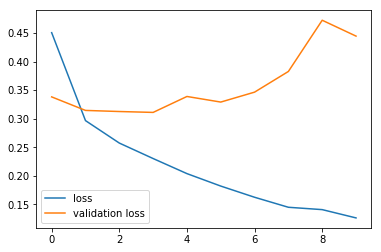

In [14]:
# plot the loss and validation loss to observe the model performance
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='validation loss')
plt.legend()

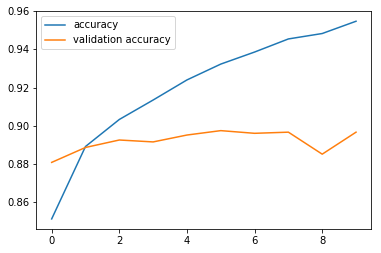

In [15]:
# plot the accuracy on Train and Test to observe the model performance
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], 
         label='validation accuracy')
plt.legend()

<a id='model_DropOuts'></a>
Add DropOuts layers to reduce Overfitting the model.

In [16]:
# creating the model using the approach called "Functional API"
i = Input(shape=np.shape(X_train[0]))
x = Conv2D(32, (3, 3), strides=2, padding='same', activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, padding='same', activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(cls_num, activation='softmax')(x)

In [17]:
model_drop = Model(i, x)

In [18]:
model_drop.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [19]:
model_drop.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.4985 - accuracy: 0.8353 - val_loss: 0.3537 - val_accuracy: 0.8719
Epoch 2/10
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.3315 - accuracy: 0.8790 - val_loss: 0.3414 - val_accuracy: 0.8797
Epoch 3/10
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.2991 - accuracy: 0.8896 - val_loss: 0.3261 - val_accuracy: 0.8797
Epoch 4/10
60000/60000 [==============================] - 50s 830us/sample - loss: 0.2765 - accuracy: 0.8975 - val_loss: 0.3099 - val_accuracy: 0.8892
Epoch 5/10
60000/60000 [==============================] - 40s 663us/sample - loss: 0.2603 - accuracy: 0.9028 - val_loss: 0.3084 - val_accuracy: 0.8906
Epoch 6/10
60000/60000 [==============================] - 39s 657us/sample - loss: 0.2434 - accuracy: 0.9098 - val_loss: 0.3179 - val_accuracy: 0.8896
Epoch 7/10
60000/60000 [==========================

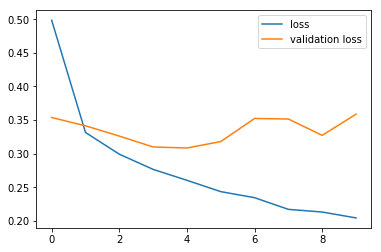

In [20]:
# plot the loss and validation loss to observe the model performance
plt.plot(model_drop.history.history['loss'], label='loss')
plt.plot(model_drop.history.history['val_loss'], label='validation loss')
plt.legend()

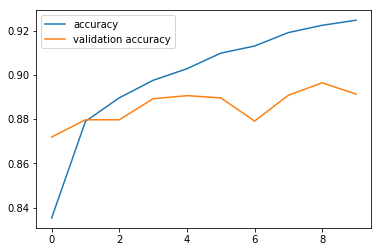

In [21]:
# plot the accuracy on Train and Test to observe the model performance
plt.plot(model_drop.history.history['accuracy'], label='accuracy')
plt.plot(model_drop.history.history['val_accuracy'], 
         label='validation accuracy')
plt.legend()

<a id='model_DropOuts_Scaling'></a>
Add DropOuts layers to reduce Overfitting the model.

At the same time Rescale the data to improve the model performance.

In [22]:
X_train = X_train/255
X_test = X_test/255

In [23]:
# creating the model using the approach called "Functional API"
i = Input(shape=np.shape(X_train[0]))
x = Conv2D(32, (3, 3), strides=2, padding='same', activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, padding='same', activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(cls_num, activation='softmax')(x)

In [24]:
model_drop_scal = Model(i, x)

In [25]:
model_drop_scal.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [26]:
model_drop_scal.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 44s 726us/sample - loss: 0.4308 - accuracy: 0.8437 - val_loss: 0.3415 - val_accuracy: 0.8732
Epoch 2/10
60000/60000 [==============================] - 41s 685us/sample - loss: 0.2907 - accuracy: 0.8925 - val_loss: 0.3015 - val_accuracy: 0.8922
Epoch 3/10
60000/60000 [==============================] - 40s 672us/sample - loss: 0.2461 - accuracy: 0.9098 - val_loss: 0.2604 - val_accuracy: 0.9047
Epoch 4/10
60000/60000 [==============================] - 41s 684us/sample - loss: 0.2123 - accuracy: 0.9209 - val_loss: 0.2478 - val_accuracy: 0.9105
Epoch 5/10
60000/60000 [==============================] - 44s 730us/sample - loss: 0.1864 - accuracy: 0.9312 - val_loss: 0.2549 - val_accuracy: 0.9124
Epoch 6/10
60000/60000 [==============================] - 46s 766us/sample - loss: 0.1639 - accuracy: 0.9380 - val_loss: 0.2412 - val_accuracy: 0.9172
Epoch 7/10
60000/60000 [====================

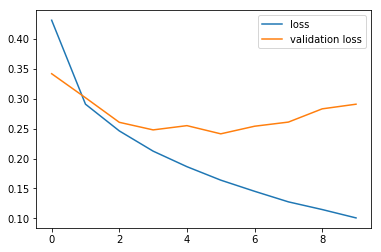

In [31]:
# plot the loss and validation loss to observe the model performance
plt.plot(model_drop_scal.history.history['loss'], label='loss')
plt.plot(model_drop_scal.history.history['val_loss'], label='validation loss')
plt.legend()

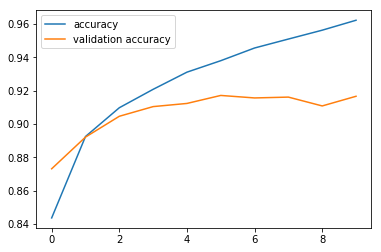

In [32]:
# plot the accuracy on Train and Test to observe the model performance
plt.plot(model_drop_scal.history.history['accuracy'], label='accuracy')
plt.plot(model_drop_scal.history.history['val_accuracy'], 
         label='validation accuracy')
plt.legend()

<a id='metrices'></a>
General overview of the model performance using Confusion Metrix.

[1.7622946e-06 1.8111046e-11 1.4667786e-10 3.7164005e-11 7.3003009e-10
 7.4293580e-06 6.3215757e-09 5.0794853e-07 1.0009699e-10 9.9999034e-01]
9
[[870   1  14  21   2   1  83   1   7   0]
 [  0 984   0   7   3   0   4   0   2   0]
 [ 16   2 859   7  68   0  45   0   3   0]
 [  8   1   7 951  10   0  21   0   2   0]
 [  2   0  42  28 866   0  61   0   1   0]
 [  0   0   0   0   0 976   0  18   0   6]
 [ 93   2  54  25  64   0 755   0   7   0]
 [  0   0   0   0   0   6   0 983   0  11]
 [  5   1   0   6   0   1   3   4 980   0]
 [  0   0   0   0   0   8   1  48   0 943]]


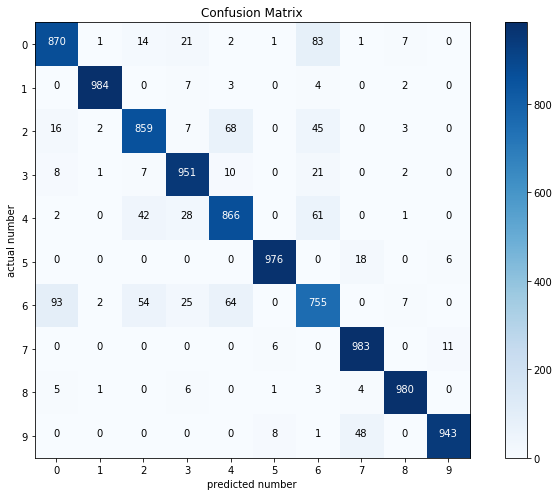

In [28]:
# 

from sklearn.metrics import confusion_matrix
import itertools

def my_confusion_matrix(con_mat, cls, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This Function shows the confusion matrix in a nice format and color.
        
    return:
        It returns nothing and only plot the matrix in a nice format.
    """
    
    #print(con_mat)
    
    plt.figure(figsize=(10,7))
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))
    
    plt.xlabel('predicted number')
    plt.ylabel('actual number')
    
    #print(range(con_mat.shape[0], con_mat.shape[1]))
    for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
        #print(con_mat[i,j])
        plt.text(j, i, con_mat[i,j], 
                 horizontalalignment='center', 
                 color='white' if  i==j else 'black')
    
    plt.tight_layout()
    plt.show()
    
pred = model_drop_scal.predict(X_test)
print(pred[0])

pred_arg = pred.argmax(axis=1)
print(pred_arg[0])

con_mat = confusion_matrix(y_test, pred_arg)
print(con_mat)

my_confusion_matrix(con_mat, list(range(10)))